In [1]:
del

SyntaxError: invalid syntax (3545070469.py, line 1)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [13]:
# choose the day (not hour) dataset
df = pd.read_csv("dataset/Bike-Sharing-Dataset/day.csv")

1. Understand the data and business question
Discrete variables: dteday, season, year, month, hour, holiday, weekday, workday, weathersit, casual, registered, cnt
Continuous variables: temp, atemp, hum, windspeed
Target variables: number of users (casual, registered, total count)
Business question: how do factors including season, holiday, temperature and weather affect the number of users of the bike sharing service?
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divid
ed to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values a
re divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67
(max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [14]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# drop df.yr as the year (2011/12) is not meaningful in the analysis
df = df.drop(columns = ["yr"])

In [17]:
# check if there is missing data
df.isna().sum()

instant       0
dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
df_season = df.groupby("season").mean()

TypeError: agg function failed [how->mean,dtype->object]

Text(0.5, 1.0, 'Bike Sharing Usage in Four Seasons')

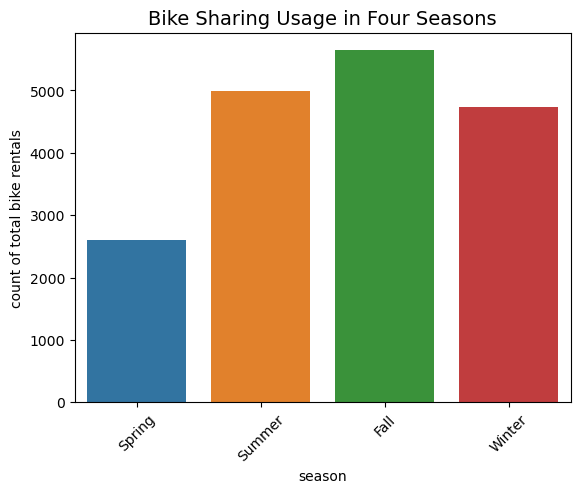

In [ ]:
sns.barplot(data = df_season, x = "season", y = "cnt")
labels = ["Spring","Summer","Fall","Winter"]
plt.xticks([0,1,2,3],labels, rotation = 45)
plt.ylabel("count of total bike rentals")
plt.title("Bike Sharing Usage in Four Seasons", fontsize = 14)

From the above bar chart, we can observe theat bike rental is the highest in Fall and lowest in
Spring. One possible reason is that the windspeed is higher in spring, making it less ideal for
biking.
Below is an analysis specifically on windspeed's correlation with seasons.

Text(0.5, 1.0, 'Windspeed by season')

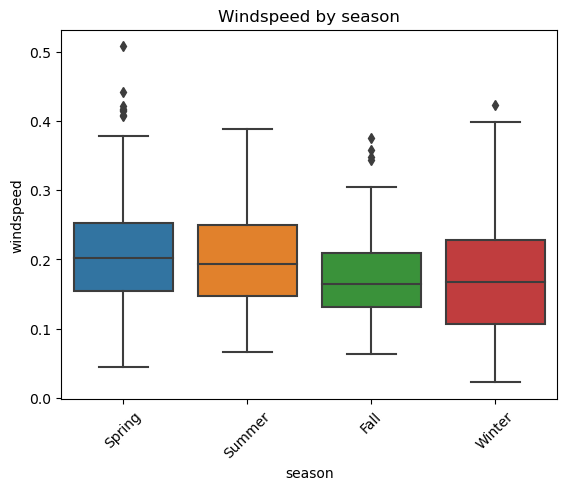

In [ ]:
sns.boxplot(data =df,x ="season", y ="windspeed")
xlabels = ["Spring","Summer","Fall","Winter"]
plt.xticks([0,1,2,3],labels, rotation = 45)
plt.xlabel("season")
plt.ylabel("windspeed")
plt.title("Windspeed by season")

The above chart shows that windspeed is highest in Spring (1) and lower in summer (2) and fall
(3).

4. Weather Conditions (Casual vs Registered Users)

In [ ]:
weather = df.groupby("weathersit").mean()
weather.reset_index()

/var/folders/w8/hd7k7n4n3s5bl7rzx8cf6y2c0000gn/T/ipykernel_4517/2261603794.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather = df.groupby("weathersit").mean()


,weathersit,instant,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,368.544276,2.498920,6.462203,0.032397,2.952484,0.663067,0.511541,0.488596,0.565594,0.190253,964.030238,3912.755940,4876.786177
1,2,363.765182,2.453441,6.493927,0.024291,3.064777,0.716599,0.470366,0.452868,0.725887,0.186431,687.352227,3348.510121,4035.862348
2,3,336.190476,2.952381,8.095238,0.000000,3.190476,0.761905,0.433440,0.413064,0.848872,0.243336,185.476190,1617.809524,1803.285714


Text(0, 0.5, 'Count of Rentals')

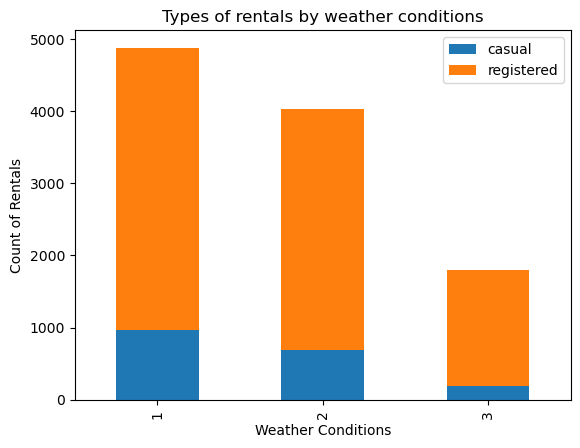

In [ ]:
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
weather.plot(y = ["casual","registered"],kind= "bar",stacked = True)
plt.title("Types of rentals by weather conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Count of Rentals")

From the above barchart, we can see that in bad weather conditions (3 stands for snow), casual
rental users dramatically dropped, while registered users dropped more mildly.

5. Bivariate Analysis

<Axes: >

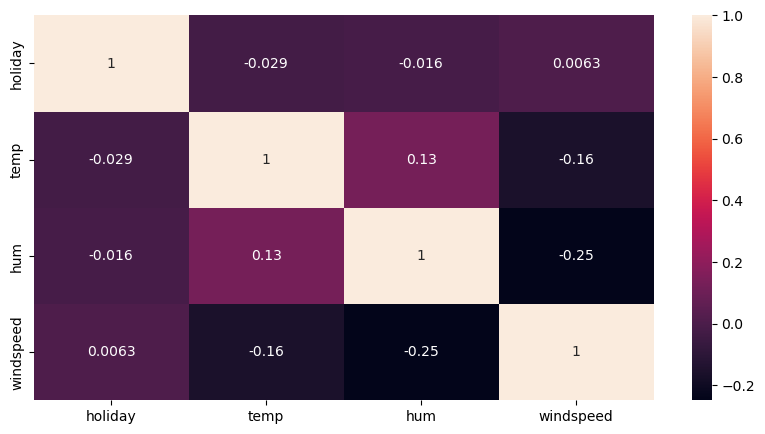

In [ ]:
# plot heatmap that shows correlation between different variables
plt.subplots(figsize=(10,5))
correlation_matrix = df[["holiday","temp","hum","windspeed"]].corr()
sns.heatmap(correlation_matrix, annot = True)

From the heatmap, we can see that humidity and windspeed has a correlation of 0.25, which
indicates a slight positive relationship.

In [ ]:
weekday = df.groupby("weekday").mean()
weekday.head()

/var/folders/w8/hd7k7n4n3s5bl7rzx8cf6y2c0000gn/T/ipykernel_4517/3459112073.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday = df.groupby("weekday").mean()


,instant,season,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,
0,366.0,2.485714,6.476190,0.000000,0.000000,1.304762,0.483628,0.465288,0.627659,0.188530,1338.295238,2890.533333,4228.828571
1,367.0,2.495238,6.495238,0.142857,0.857143,1.390476,0.493449,0.474563,0.637577,0.190691,674.133333,3663.990476,4338.123810
2,364.5,2.519231,6.480769,0.009615,0.990385,1.442308,0.504282,0.483337,0.641829,0.191825,556.182692,3954.480769,4510.663462
3,365.5,2.500000,6.509615,0.009615,0.990385,1.451923,0.504626,0.481610,0.645368,0.187736,551.144231,3997.394231,4548.538462
4,366.5,2.509615,6.548077,0.019231,0.980769,1.384615,0.504342,0.482700,0.609499,0.191603,590.961538,4076.298077,4667.259615


<Axes: xlabel='weekday'>

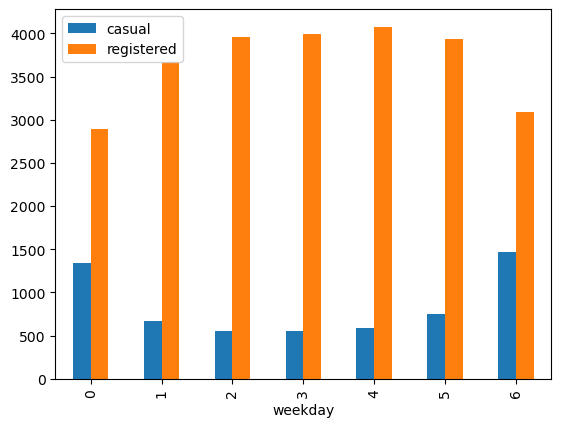

In [ ]:
weekday.plot(y = ["casual","registered"],kind= "bar")